In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf')#清空變數
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib import colors as colors
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import multivariate_normal
import seaborn as sns
img_dir = '../images/'
data_dir = '../ml_data/'

/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_2196/1092070053.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')#清空變數


# LDA圖範例

Training error for LDA=0.0900


ValueError: A colormap named "red_blue_classes" is already registered.

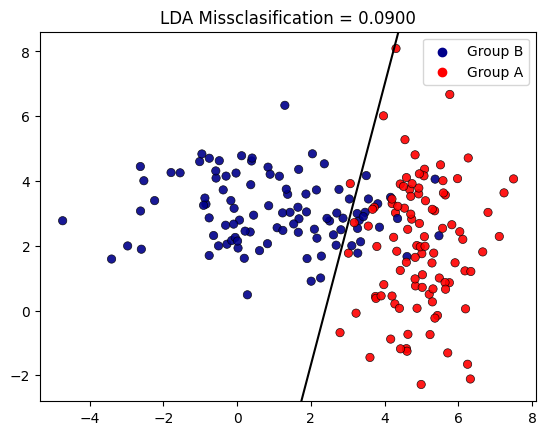

In [3]:
#載入資料 畫出scatter
D = np.loadtxt(data_dir + 'la_2.txt', comments='%') 
X = D[:, 0:2]
y = D[:,2].astype('int')
# area = 2 * np.random.randint(50, size = D[:, 0].size) 
# grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y] 
# plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )
# plt.scatter(D[:, 0], D[:, 1], c = grp_color, alpha = 0.5, marker = 'o' )
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
# plt.grid(True)

#fit LDA模型，跑出錯判率
Lda = LinearDiscriminantAnalysis(tol = 1e-6) 
Lda.fit(X, y)
MissClassRateLDA = 1 - Lda.score(X, y)
print("Training error for LDA={:.4f}".format(MissClassRateLDA))
plt.title('LDA Missclasification = {:.4f}'.format(MissClassRateLDA))

#畫出等高線圖
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)

Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z = Z[:, 1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,Z,[0.5],colors="black")

cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)
plt.savefig(img_dir+'LDA.pdf', format='pdf')
plt.show()



# QDA圖範例

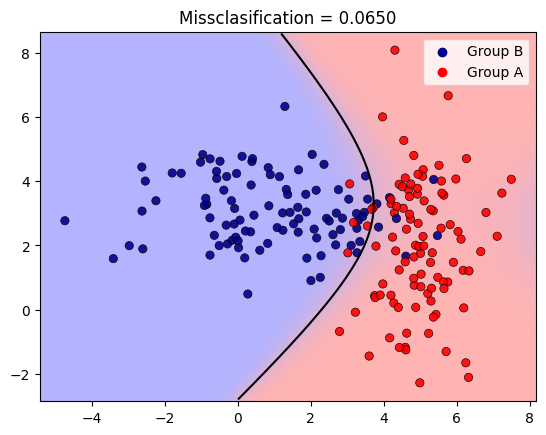

In [75]:
#載入資料 畫出scatter
D = np.loadtxt(data_dir + 'la_2.txt', comments='%') 
X = D[:, 0:2]
y = D[:,2].astype('int')
# area = 2 * np.random.randint(50, size = D[:, 0].size) 
# grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y] 
# plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )
# plt.scatter(D[:, 0], D[:, 1], c = grp_color, alpha = 0.5, marker = 'o' )
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
# plt.grid(True)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
MissClassRateQDA = 1 - Qda.score(X, y)
plt.title('Missclasification = {:.4f}'.format(MissClassRateQDA))

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #predict_proba 計算後驗機率值 #這個是得分,每個分類器的得分，取最大得分對應的類。
Z = Z[:, 1].reshape(xx.shape)
contoursQDA=plt.contour(xx,yy,Z,[0.5],colors="black")

cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blu_classes', cdit)
# plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = cmap, norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)
plt.savefig(img_dir+'QDA.pdf', format='pdf')
plt.show()

# KNN圖範例

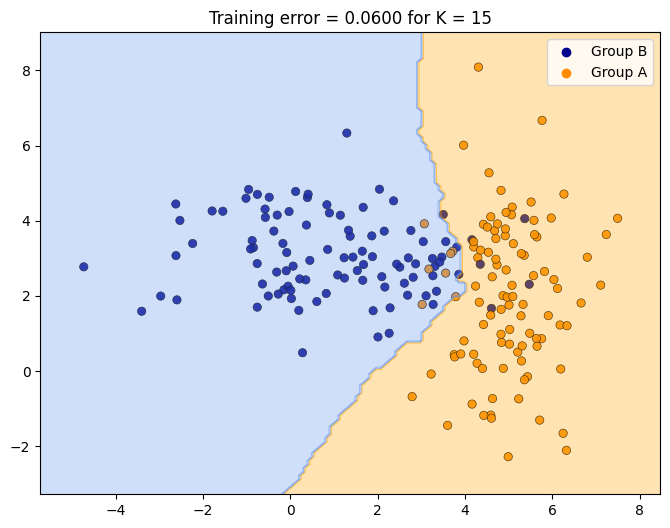

In [76]:
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%') 
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers 調整為整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
K = 15
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K, weights = weights) 
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

z =Knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z =z.reshape(xx.shape)
cmap_light = ListedColormap(['orange','cornflowerblue']) 
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3) 
plt.title('Training error = %.4f for K = %i' % (trainingErr,K))
plt.savefig(img_dir+'KNN.pdf', format='pdf')

# 生成兩群資料

In [75]:
def GenDataforTwo(n1,n2,mu1,mu2,Cov1,Cov2):
    mvn1 = multivariate_normal(mean=mu1, cov=Cov1)
    mvn2 = multivariate_normal(mean=mu2, cov=Cov2)
    A, B = mvn1.rvs(n1), mvn2.rvs(n2)
    X = np.vstack((A, B))
    y = np.hstack((np.zeros(n1), np.ones(n2)))
    return X, y

# 第一組資料生成（兩群組）

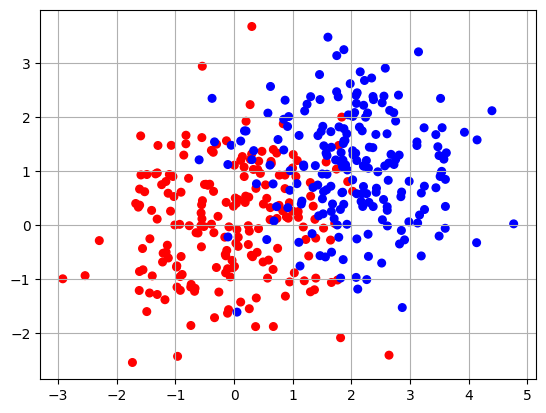

In [81]:
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
# np.savetxt('demo_data5-1.txt', np.c_[X, y],\
#      fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

In [8]:
#載入第一筆資料
D1 = np.loadtxt(data_dir + 'demo_data5-1.txt', comments='#')
X = D1[:, 0:2]
y = D1[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
#接下來要跑100次
K = 100

#設定各個模型資訊
Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA_trainingErr = np.zeros(K)
LDA_testingErr =np.zeros(K)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
QDA_trainingErr = np.zeros(K)
QDA_testingErr =np.zeros(K)

weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
KNN5_trainingErr = np.zeros(K)
KNN5_testingErr =np.zeros(K)

Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
KNN15_trainingErr = np.zeros(K)
KNN15_testingErr =np.zeros(K)

#訓練模型，跑出誤判率
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    Qda.fit(X_train, y_train)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    Knn5.fit(X_train, y_train)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    Knn15.fit(X_train, y_train)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)


#print誤判率
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN for K=5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN for K=5  testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN for K=15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN for K=15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))


LDA training Error:0.1333
LDA testing Error:0.1388
QDA training Error:0.1341
QDA testing Error:0.1432
KNN for K=5 training Error:0.1142
KNN for K=5  testing Error:0.1565
KNN for K=15 training Error:0.1308
KNN for K=15 testing Error:0.1470


# 第一組LDA

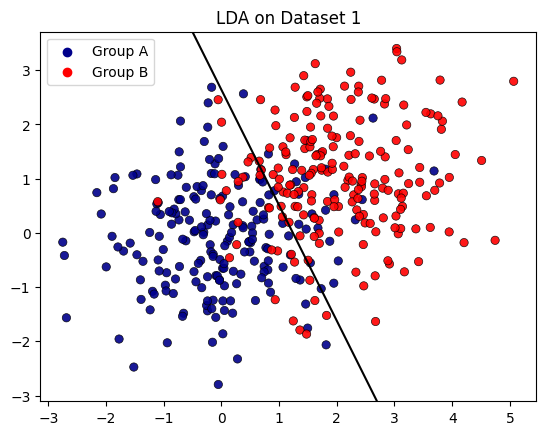

In [17]:
D1 = np.loadtxt(data_dir + 'demo_data5-1.txt', comments='#')
X = D1[:, 0:2]
y = D1[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('LDA on Dataset 1')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda=Lda.fit(X, y) #learning
Z_lda = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_lda = Z_lda[:, 1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,Z_lda,[0.5],colors="black")
plt.savefig(img_dir+"experiment1_LDA.pdf", format='pdf')


# 第一組QDA

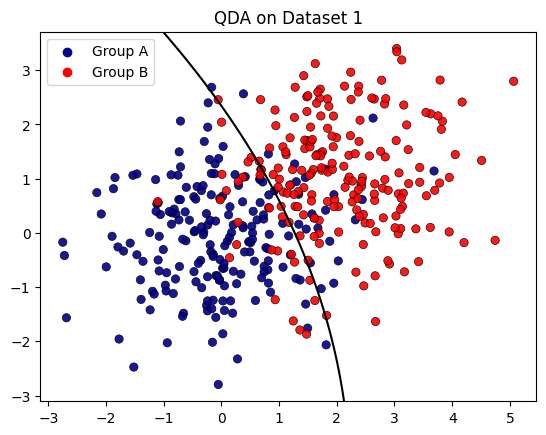

In [18]:
D1 = np.loadtxt(data_dir + 'demo_data5-1.txt', comments='#')
X = D1[:, 0:2]
y = D1[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('QDA on Dataset 1')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
Z_qda = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_qda = Z_qda[:, 1].reshape(xx.shape)
contoursQDA=plt.contour(xx,yy,Z_qda,[0.5],colors="black")
plt.savefig(img_dir+"experiment1_QDA.pdf", format='pdf')

# 第一組KNN K=5

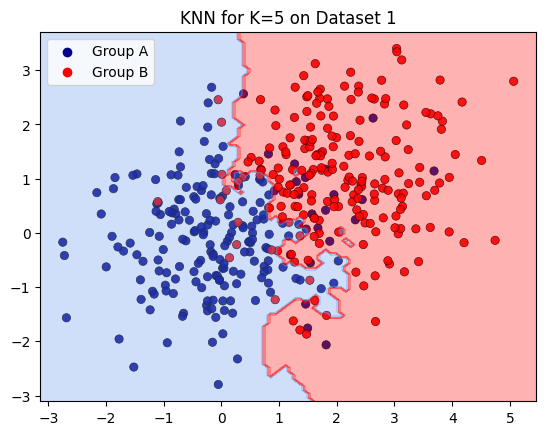

In [22]:
D1 = np.loadtxt(data_dir + 'demo_data5-1.txt', comments='#')
X = D1[:, 0:2]
y = D1[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('KNN for K=5 on Dataset 1')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
Knn5.fit(X, y)
Z_knn5 = Knn5.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_knn5 = Z_knn5.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue','red']) 
plt.contourf(xx, yy, Z_knn5, cmap = cmap_light, alpha = 0.3) 
plt.savefig(img_dir+"experiment1_KNN5.pdf", format='pdf')

# 第一組KNN K=15 

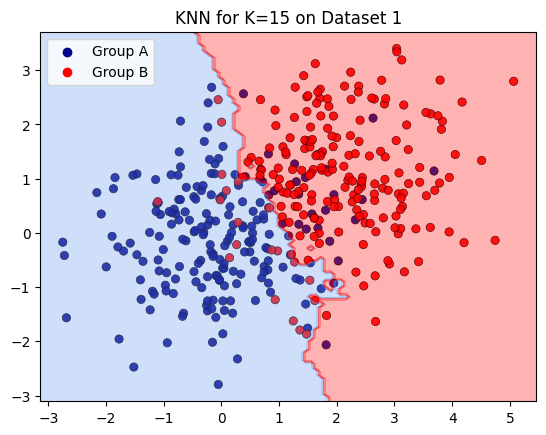

In [23]:
D1 = np.loadtxt(data_dir + 'demo_data5-1.txt', comments='#')
X = D1[:, 0:2]
y = D1[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('KNN for K=15 on Dataset 1')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
Knn15.fit(X, y)
Z_knn15 = Knn15.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_knn15 = Z_knn15.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue','red']) 
plt.contourf(xx, yy, Z_knn15, cmap = cmap_light, alpha = 0.3) 
plt.savefig(img_dir+"experiment1_KNN15.pdf", format='pdf')

# 第二組資料生成（兩群組）

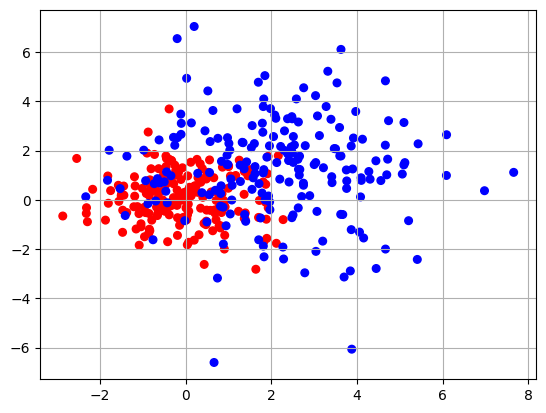

In [77]:
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[4, 0], [0, 4]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('demo_data5-2.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

In [78]:
#載入第一筆資料
D2 = np.loadtxt(data_dir + 'demo_data5-2.txt', comments='#')
X = D2[:, 0:2]
y = D2[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
#接下來要跑100次
K = 100

#設定各個模型資訊
Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA_trainingErr = np.zeros(K)
LDA_testingErr =np.zeros(K)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
QDA_trainingErr = np.zeros(K)
QDA_testingErr =np.zeros(K)

weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
KNN5_trainingErr = np.zeros(K)
KNN5_testingErr =np.zeros(K)

Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
KNN15_trainingErr = np.zeros(K)
KNN15_testingErr =np.zeros(K)

#訓練模型，跑出誤判率
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    Qda.fit(X_train, y_train)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    Knn5.fit(X_train, y_train)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    Knn15.fit(X_train, y_train)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)

#print誤判率
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN for K=5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN for K=5  testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN for K=15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN for K=15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))


LDA training Error:0.1795
LDA testing Error:0.1895
QDA training Error:0.1567
QDA testing Error:0.1654
KNN for K=5 training Error:0.1369
KNN for K=5  testing Error:0.2017
KNN for K=15 training Error:0.1600
KNN for K=15 testing Error:0.1832


# 第二組LDA

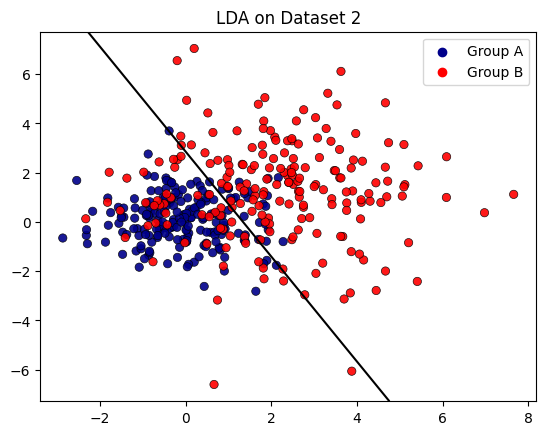

In [79]:
D2 = np.loadtxt(data_dir + 'demo_data5-2.txt', comments='#')
X = D2[:, 0:2]
y = D2[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('LDA on Dataset 2')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda=Lda.fit(X, y) #learning
Z_lda = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_lda = Z_lda[:, 1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,Z_lda,[0.5],colors="black")
plt.savefig(img_dir+"experiment2_LDA.pdf", format='pdf')

# 第二組QDA

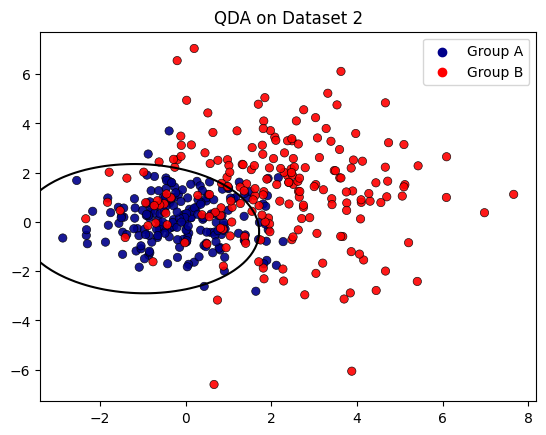

In [80]:
D2 = np.loadtxt(data_dir + 'demo_data5-2.txt', comments='#')
X = D2[:, 0:2]
y = D2[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('QDA on Dataset 2')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
Z_qda = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_qda = Z_qda[:, 1].reshape(xx.shape)
contoursQDA=plt.contour(xx,yy,Z_qda,[0.5],colors="black")
plt.savefig(img_dir+"experiment2_QDA.pdf", format='pdf')

# 第二組KNN K=5

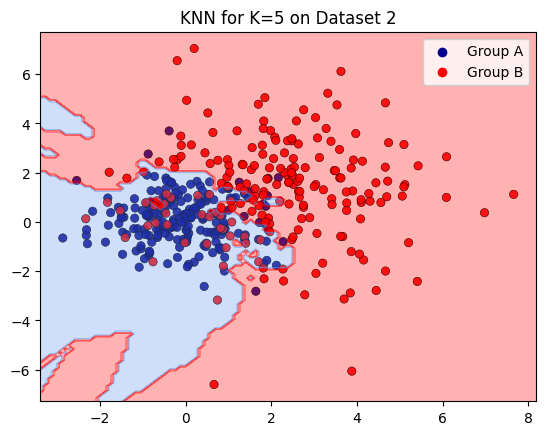

In [81]:
D2 = np.loadtxt(data_dir + 'demo_data5-2.txt', comments='#')
X = D2[:, 0:2]
y = D2[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('KNN for K=5 on Dataset 2')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
Knn5.fit(X, y)
Z_knn5 = Knn5.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_knn5 = Z_knn5.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue','red']) 
plt.contourf(xx, yy, Z_knn5, cmap = cmap_light, alpha = 0.3) 
plt.savefig(img_dir+"experiment2_KNN5.pdf", format='pdf')

# 第二組KNN K=15

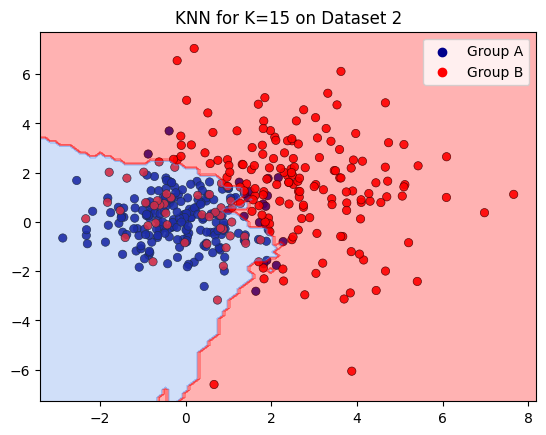

In [82]:
D2 = np.loadtxt(data_dir + 'demo_data5-2.txt', comments='#')
X = D2[:, 0:2]
y = D2[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('KNN for K=15 on Dataset 2')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
Knn15.fit(X, y)
Z_knn15 = Knn15.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_knn15 = Z_knn15.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue','red']) 
plt.contourf(xx, yy, Z_knn15, cmap = cmap_light, alpha = 0.3) 
plt.savefig(img_dir+"experiment2_KNN15.pdf", format='pdf')

# 第三組資料生成（兩群組）

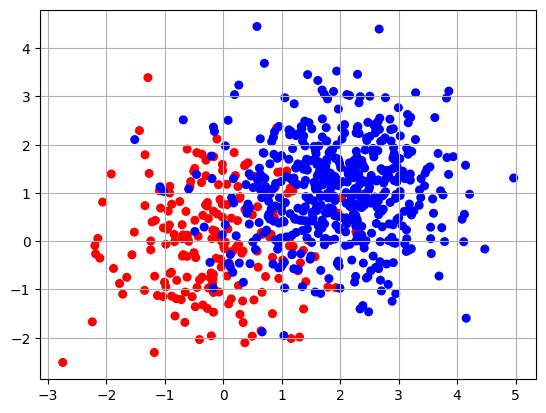

In [95]:
n1, n2 = 200, 500
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
# np.savetxt('demo_data5-3.txt', np.c_[X, y],\
#      fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

In [96]:
#載入第一筆資料
D3 = np.loadtxt(data_dir + 'demo_data5-3.txt', comments='#')
X = D3[:, 0:2]
y = D3[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
#接下來要跑100次
K = 100

#設定各個模型資訊
Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA_trainingErr = np.zeros(K)
LDA_testingErr =np.zeros(K)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
QDA_trainingErr = np.zeros(K)
QDA_testingErr =np.zeros(K)

weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
KNN5_trainingErr = np.zeros(K)
KNN5_testingErr =np.zeros(K)

Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
KNN15_trainingErr = np.zeros(K)
KNN15_testingErr =np.zeros(K)

#訓練模型，跑出誤判率
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    Qda.fit(X_train, y_train)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    Knn5.fit(X_train, y_train)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    Knn15.fit(X_train, y_train)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)

#print誤判率
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN for K=5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN for K=5  testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN for K=15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN for K=15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))


LDA training Error:0.1193
LDA testing Error:0.1196
QDA training Error:0.1197
QDA testing Error:0.1204
KNN for K=5 training Error:0.1022
KNN for K=5  testing Error:0.1459
KNN for K=15 training Error:0.1184
KNN for K=15 testing Error:0.1336


# 第三組LDA

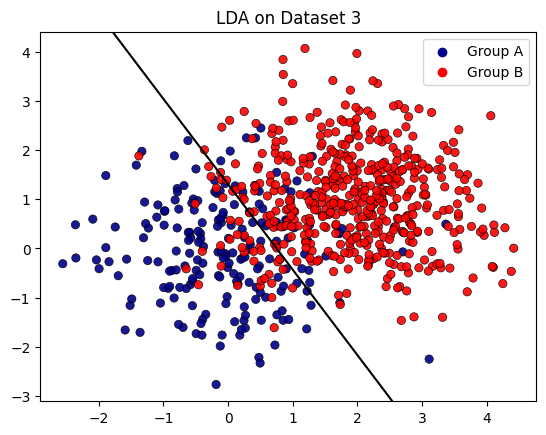

In [15]:
D3 = np.loadtxt(data_dir + 'demo_data5-3.txt', comments='#')
X = D3[:, 0:2]
y = D3[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('LDA on Dataset 3')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda=Lda.fit(X, y) #learning
Z_lda = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_lda = Z_lda[:, 1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,Z_lda,[0.5],colors="black")
plt.savefig(img_dir+"experiment3_LDA.pdf", format='pdf')

# 第三組QDA

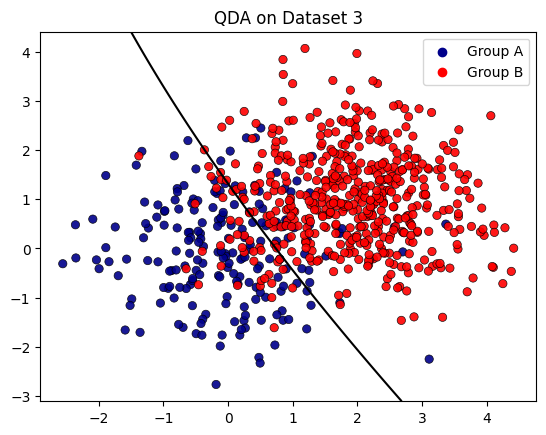

In [20]:
D3 = np.loadtxt(data_dir + 'demo_data5-3.txt', comments='#')
X = D3[:, 0:2]
y = D3[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('QDA on Dataset 3')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
Z_qda = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_qda = Z_qda[:, 1].reshape(xx.shape)
contoursQDA=plt.contour(xx,yy,Z_qda,[0.5],colors="black")
plt.savefig(img_dir+"experiment3_QDA.pdf", format='pdf')

# 第三組KNN K=5

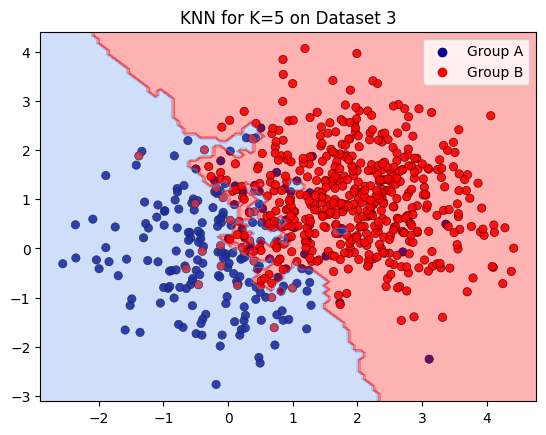

In [26]:
D3 = np.loadtxt(data_dir + 'demo_data5-3.txt', comments='#')
X = D3[:, 0:2]
y = D3[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('KNN for K=5 on Dataset 3')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
Knn5.fit(X, y)
Z_knn5 = Knn5.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_knn5 = Z_knn5.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue','red']) 
plt.contourf(xx, yy, Z_knn5, cmap = cmap_light, alpha = 0.3) 
plt.savefig(img_dir+"experiment3_KNN5.pdf", format='pdf')

# 第三組KNN K=15

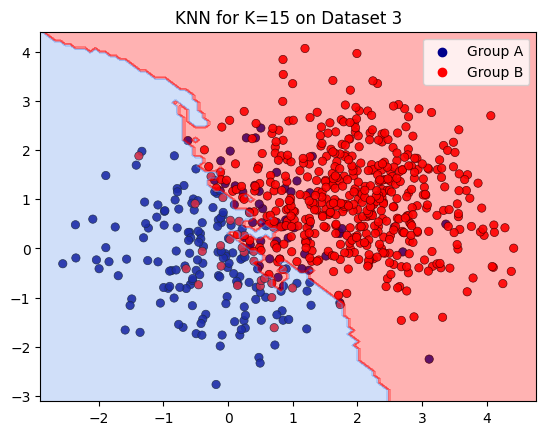

In [27]:
D3 = np.loadtxt(data_dir + 'demo_data5-3.txt', comments='#')
X = D3[:, 0:2]
y = D3[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('KNN for K=15 on Dataset 3')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
Knn15.fit(X, y)
Z_knn15 = Knn15.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_knn15 = Z_knn15.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue','red']) 
plt.contourf(xx, yy, Z_knn15, cmap = cmap_light, alpha = 0.3) 
plt.savefig(img_dir+"experiment3_KNN15.pdf", format='pdf')

# 第四組資料生成（兩群組）

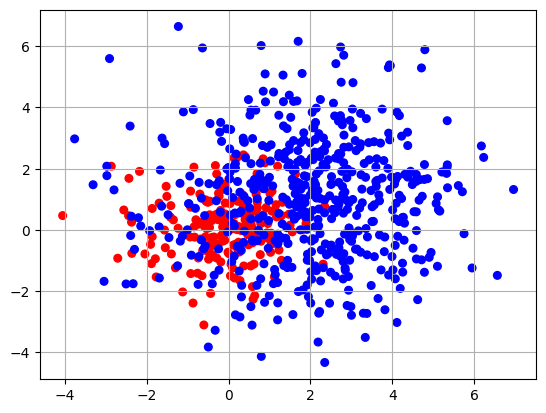

In [101]:
n1, n2 = 200, 500
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[4, 0], [0, 4]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
# np.savetxt('demo_data5-4.txt', np.c_[X, y],\
#      fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

In [103]:
#載入第一筆資料
D4 = np.loadtxt(data_dir + 'demo_data5-4.txt', comments='#')
X = D4[:, 0:2]
y = D4[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
#接下來要跑100次
K = 100

#設定各個模型資訊
Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA_trainingErr = np.zeros(K)
LDA_testingErr =np.zeros(K)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
QDA_trainingErr = np.zeros(K)
QDA_testingErr =np.zeros(K)

weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
KNN5_trainingErr = np.zeros(K)
KNN5_testingErr =np.zeros(K)

Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
KNN15_trainingErr = np.zeros(K)
KNN15_testingErr =np.zeros(K)

#訓練模型，跑出誤判率
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    Qda.fit(X_train, y_train)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    Knn5.fit(X_train, y_train)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    Knn15.fit(X_train, y_train)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)


#print誤判率
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN for K=5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN for K=5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN for K=15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN for K=15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))


LDA training Error:0.2341
LDA testing Error:0.2384
QDA training Error:0.1968
QDA testing Error:0.2039
KNN for K=5 training Error:0.1348
KNN for K=5 testing Error:0.2077
KNN for K=15 training Error:0.1669
KNN for K=15 testing Error:0.1985


# 第四組LDA

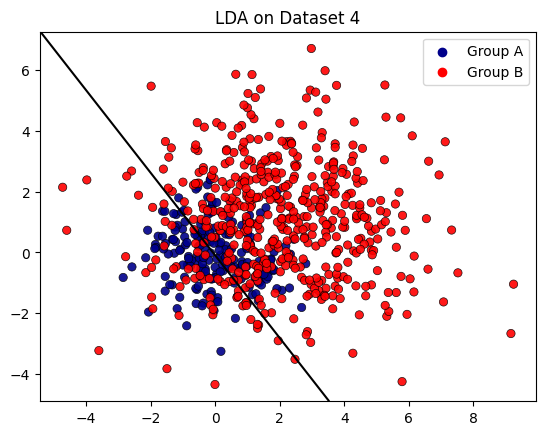

In [14]:
D4 = np.loadtxt(data_dir + 'demo_data5-4.txt', comments='#')
X = D4[:, 0:2]
y = D4[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('LDA on Dataset 4')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda=Lda.fit(X, y) #learning
Z_lda = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_lda = Z_lda[:, 1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,Z_lda,[0.5],colors="black")
plt.savefig(img_dir+"experiment4_LDA.pdf", format='pdf')

# 第四組QDA

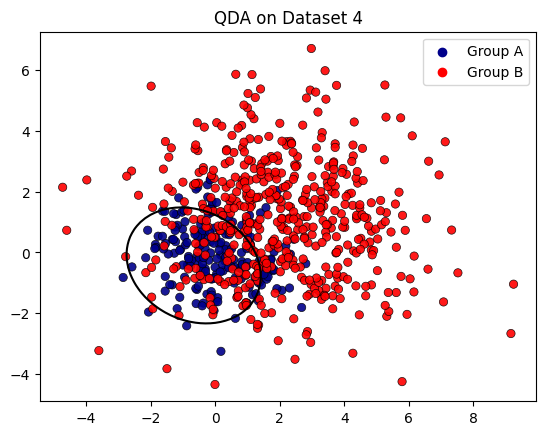

In [21]:
D4 = np.loadtxt(data_dir + 'demo_data5-4.txt', comments='#')
X = D4[:, 0:2]
y = D4[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('QDA on Dataset 4')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
Z_qda = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_qda = Z_qda[:, 1].reshape(xx.shape)
contoursQDA=plt.contour(xx,yy,Z_qda,[0.5],colors="black")
plt.savefig(img_dir+"experiment4_QDA.pdf", format='pdf')

# 第四組KNN K=5

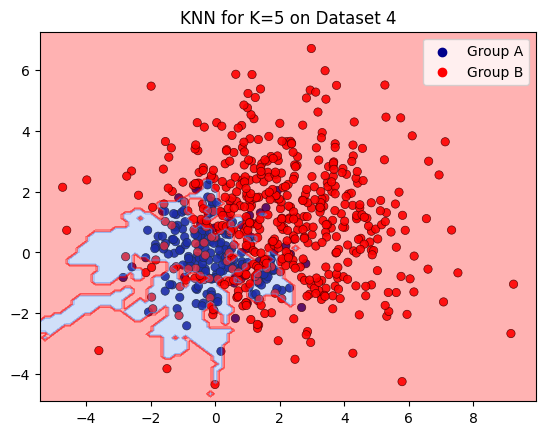

In [28]:
D4 = np.loadtxt(data_dir + 'demo_data5-4.txt', comments='#')
X = D4[:, 0:2]
y = D4[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('KNN for K=5 on Dataset 4')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
Knn5.fit(X, y)
Z_knn5 = Knn5.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_knn5 = Z_knn5.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue','red']) 
plt.contourf(xx, yy, Z_knn5, cmap = cmap_light, alpha = 0.3) 
plt.savefig(img_dir+"experiment4_KNN5.pdf", format='pdf')

# 第四組KNN K=15

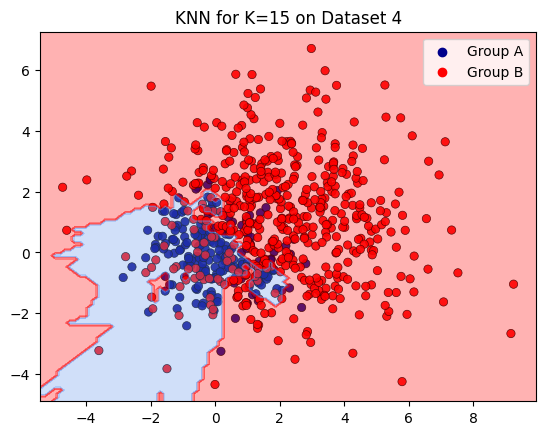

In [29]:
D4 = np.loadtxt(data_dir + 'demo_data5-4.txt', comments='#')
X = D4[:, 0:2]
y = D4[:, 2].astype('int')
Group_name = np.array(['Group A', 'Group B'])#給群組名稱
cmap_bold = ['darkblue', 'red']
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.title('KNN for K=15 on Dataset 4')

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
Knn15.fit(X, y)
Z_knn15 = Knn15.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z_knn15 = Z_knn15.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue','red']) 
plt.contourf(xx, yy, Z_knn15, cmap = cmap_light, alpha = 0.3) 
plt.savefig(img_dir+"experiment4_KNN15.pdf", format='pdf')

# 生成三群資料

In [42]:
def GenDataforThree(n1,n2,n3,mu1,mu2,mu3,Cov1,Cov2,Cov3):
    mvn1 = multivariate_normal(mean=mu1, cov=Cov1)
    mvn2 = multivariate_normal(mean=mu2, cov=Cov2)
    mvn3 = multivariate_normal(mean = mu3, cov = Cov3)
    A, B ,C= mvn1.rvs(n1), mvn2.rvs(n2),mvn3.rvs(n3)
    X = np.vstack((A, B,C))
    y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n2)*2))
    return X, y

# 第五組生成資料（三群組）(變異皆相同)

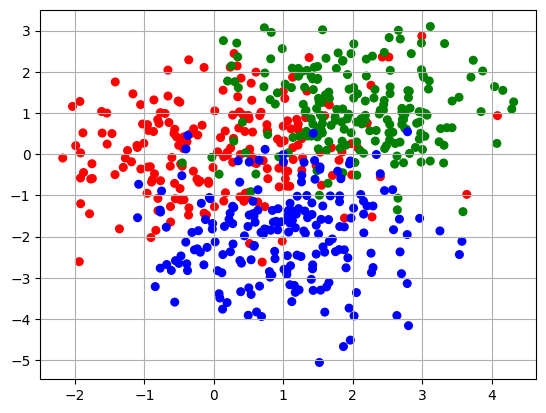

In [116]:
n1, n2,n3 = 200, 200,200
m1, m2 ,m3= np.array([0, 0]), np.array([2, 1]), np.array([1, -2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
Cov3 = np.array([[1, 0], [0, 1]])
X, y = GenDataforThree(n1,n2,n3,m1,m2,m3,Cov1,Cov2,Cov3)
# np.savetxt('demo_data5-5.txt', np.c_[X, y],\
#      fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'green'if i==1 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

In [35]:
#載入第一筆資料
D5 = np.loadtxt(data_dir + 'demo_data5-5.txt', comments='#')
X = D5[:, 0:2]
y = D5[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
#接下來要跑100次
K = 100

#設定各個模型資訊
Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA_trainingErr = np.zeros(K)
LDA_testingErr =np.zeros(K)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
QDA_trainingErr = np.zeros(K)
QDA_testingErr =np.zeros(K)

weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
KNN5_trainingErr = np.zeros(K)
KNN5_testingErr =np.zeros(K)

Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
KNN15_trainingErr = np.zeros(K)
KNN15_testingErr =np.zeros(K)

#訓練模型，跑出誤判率
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    Qda.fit(X_train, y_train)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    Knn5.fit(X_train, y_train)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    Knn15.fit(X_train, y_train)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)

#print誤判率
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN for K=5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN for K=5  testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN for K=15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN for K=15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))

LDA training Error:0.1858
LDA testing Error:0.1855
QDA training Error:0.1863
QDA testing Error:0.1865
KNN for K=5 training Error:0.1415
KNN for K=5  testing Error:0.1901
KNN for K=15 training Error:0.1699
KNN for K=15 testing Error:0.1850


# 第五組LDA

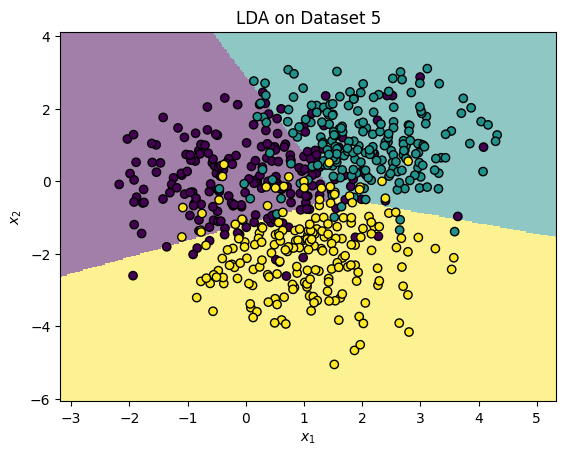

In [58]:
D5 = np.loadtxt(data_dir + 'demo_data5-5.txt', comments='#')
X = D5[:, 0:2]
y = D5[:, 2].astype('int')
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda=Lda.fit(X, y) #learning
disp = DecisionBoundaryDisplay.from_estimator(
     Lda, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('LDA on Dataset 5')
plt.savefig(img_dir+"experiment5_LDA.pdf", format='pdf')

# 第五組QDA

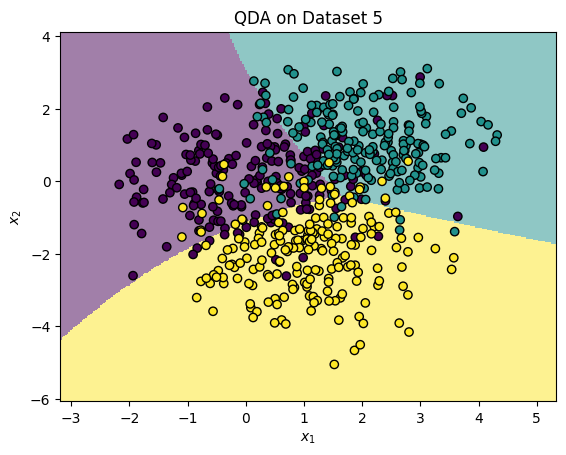

In [59]:
D5 = np.loadtxt(data_dir + 'demo_data5-5.txt', comments='#')
X = D5[:, 0:2]
y = D5[:, 2].astype('int')
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
     Qda, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('QDA on Dataset 5')
plt.savefig(img_dir+"experiment5_QDA.pdf", format='pdf')

# 第五組KNN K=5

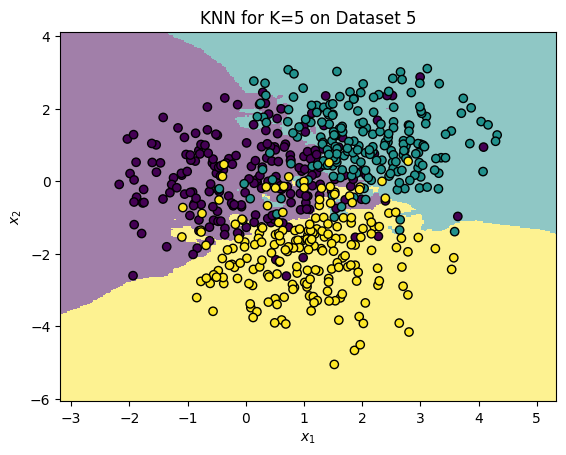

In [60]:
D5 = np.loadtxt(data_dir + 'demo_data5-5.txt', comments='#')
X = D5[:, 0:2]
y = D5[:, 2].astype('int')
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
Knn5.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
     Knn5, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('KNN for K=5 on Dataset 5')
plt.savefig(img_dir+"experiment5_KNN5.pdf", format='pdf')

# 第五組KNN K=15

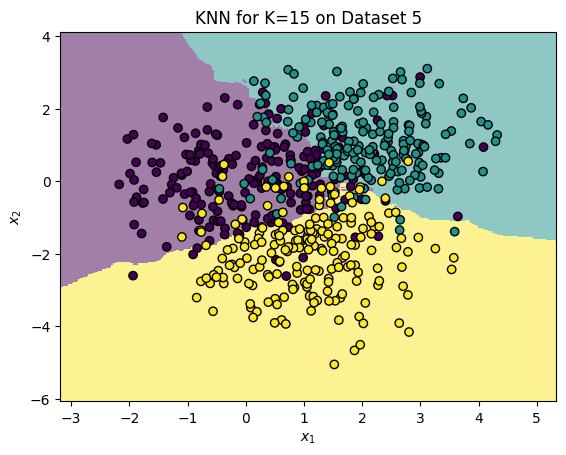

In [61]:
D5 = np.loadtxt(data_dir + 'demo_data5-5.txt', comments='#')
X = D5[:, 0:2]
y = D5[:, 2].astype('int')
Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
Knn15.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
     Knn15, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('KNN for K=15 on Dataset 5')
plt.savefig(img_dir+"experiment5_KNN15.pdf", format='pdf')

# 第六組生成資料（三群組）（變異兩同一異）

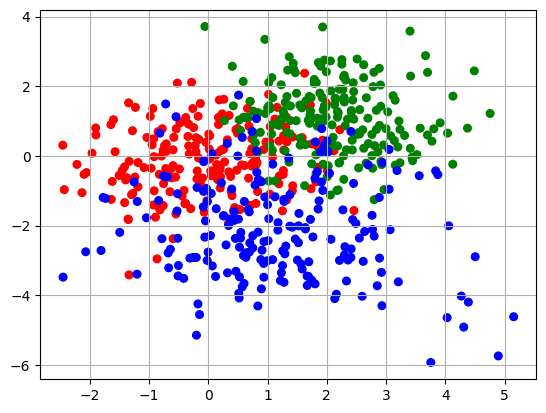

In [45]:
n1, n2,n3 = 200, 200,200
m1, m2 ,m3= np.array([0, 0]), np.array([2, 1]), np.array([1, -2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
Cov3 = np.array([[2, 0], [0, 2]])
X, y = GenDataforThree(n1,n2,n3,m1,m2,m3,Cov1,Cov2,Cov3)
# np.savetxt('demo_data5-6.txt', np.c_[X, y],\
#      fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'green'if i==1 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

In [46]:
#載入第一筆資料
D6 = np.loadtxt(data_dir + 'demo_data5-6.txt', comments='#')
X = D6[:, 0:2]
y = D6[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
#接下來要跑100次
K = 100

#設定各個模型資訊
Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA_trainingErr = np.zeros(K)
LDA_testingErr =np.zeros(K)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
QDA_trainingErr = np.zeros(K)
QDA_testingErr =np.zeros(K)

weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
KNN5_trainingErr = np.zeros(K)
KNN5_testingErr =np.zeros(K)

Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
KNN15_trainingErr = np.zeros(K)
KNN15_testingErr =np.zeros(K)

#訓練模型，跑出誤判率
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    Qda.fit(X_train, y_train)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    Knn5.fit(X_train, y_train)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    Knn15.fit(X_train, y_train)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)

#print誤判率
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN for K=5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN for K=5  testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN for K=15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN for K=15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))

LDA training Error:0.2019
LDA testing Error:0.2121
QDA training Error:0.2002
QDA testing Error:0.2090
KNN for K=5 training Error:0.1749
KNN for K=5  testing Error:0.2418
KNN for K=15 training Error:0.1960
KNN for K=15 testing Error:0.2224


#第六組LDA

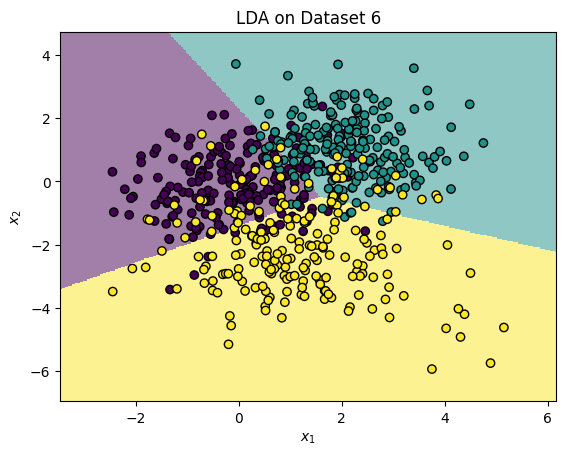

In [62]:
D6 = np.loadtxt(data_dir + 'demo_data5-6.txt', comments='#')
X = D6[:, 0:2]
y = D6[:, 2].astype('int')
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda=Lda.fit(X, y) #learning
disp = DecisionBoundaryDisplay.from_estimator(
     Lda, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('LDA on Dataset 6')
plt.savefig(img_dir+"experiment6_LDA.pdf", format='pdf')

# 第六組QDA

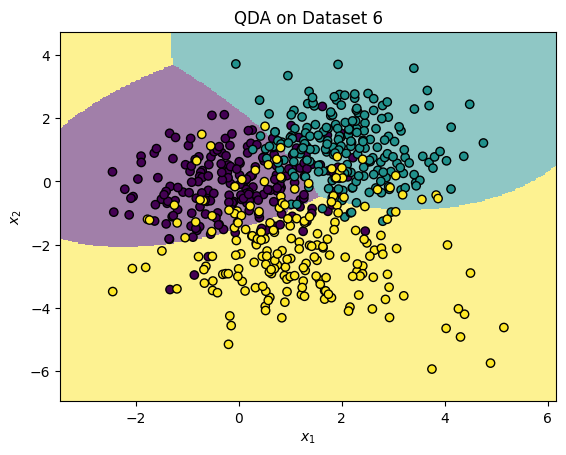

In [63]:
D6 = np.loadtxt(data_dir + 'demo_data5-6.txt', comments='#')
X = D6[:, 0:2]
y = D6[:, 2].astype('int')
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
     Qda, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('QDA on Dataset 6')
plt.savefig(img_dir+"experiment6_QDA.pdf", format='pdf')

# 第六組 KNN K=5

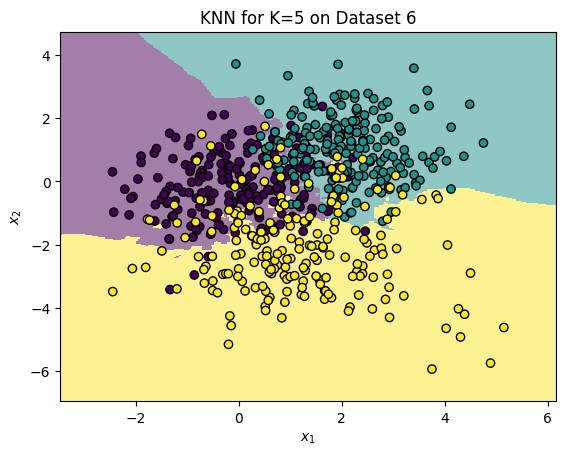

In [64]:
D6 = np.loadtxt(data_dir + 'demo_data5-6.txt', comments='#')
X = D6[:, 0:2]
y = D6[:, 2].astype('int')
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
Knn5.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
     Knn5, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('KNN for K=5 on Dataset 6')
plt.savefig(img_dir+"experiment6_KNN5.pdf", format='pdf')

# 第六組 KNN K=15

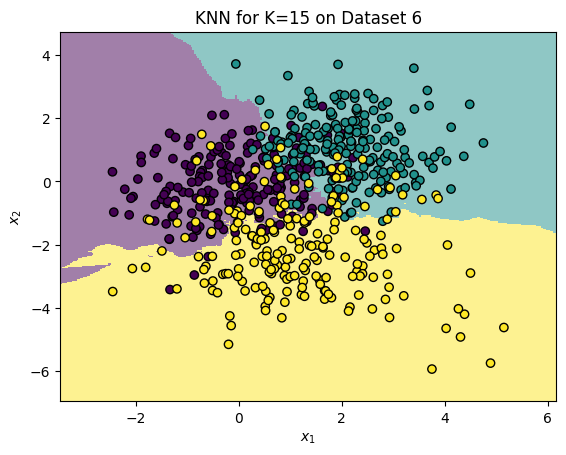

In [65]:
D6 = np.loadtxt(data_dir + 'demo_data5-6.txt', comments='#')
X = D6[:, 0:2]
y = D6[:, 2].astype('int')
Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
Knn15.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
     Knn15, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('KNN for K=15 on Dataset 6')
plt.savefig(img_dir+"experiment6_KNN15.pdf", format='pdf')

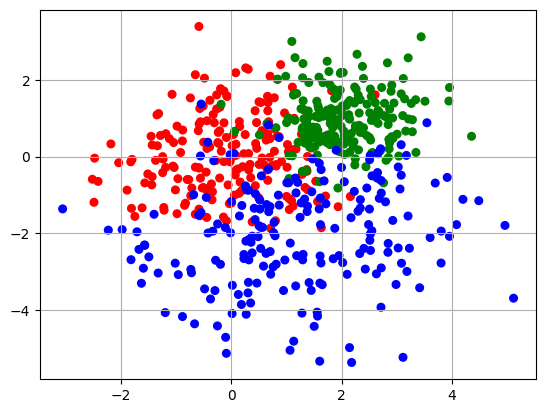

In [52]:
n1, n2,n3 = 200, 200,200
m1, m2 ,m3= np.array([0, 0]), np.array([2, 1]), np.array([1, -2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[0.5, 0], [0, 0.5]])
Cov3 = np.array([[2, 0], [0, 2]])
X, y = GenDataforThree(n1,n2,n3,m1,m2,m3,Cov1,Cov2,Cov3)
# np.savetxt('demo_data5-7.txt', np.c_[X, y],\
#      fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'green'if i==1 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.show()

In [53]:
#載入第一筆資料
D7 = np.loadtxt(data_dir + 'demo_data5-7.txt', comments='#')
X = D7[:, 0:2]
y = D7[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
#接下來要跑100次
K = 100

#設定各個模型資訊
Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA_trainingErr = np.zeros(K)
LDA_testingErr =np.zeros(K)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
QDA_trainingErr = np.zeros(K)
QDA_testingErr =np.zeros(K)

weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
KNN5_trainingErr = np.zeros(K)
KNN5_testingErr =np.zeros(K)

Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
KNN15_trainingErr = np.zeros(K)
KNN15_testingErr =np.zeros(K)

#訓練模型，跑出誤判率
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    Qda.fit(X_train, y_train)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    Knn5.fit(X_train, y_train)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    Knn15.fit(X_train, y_train)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)

#print誤判率
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN for K=5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN for K=5  testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN for K=15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN for K=15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))

LDA training Error:0.1626
LDA testing Error:0.1682
QDA training Error:0.1435
QDA testing Error:0.1521
KNN for K=5 training Error:0.1188
KNN for K=5  testing Error:0.1591
KNN for K=15 training Error:0.1377
KNN for K=15 testing Error:0.1540


# 第七組LDA

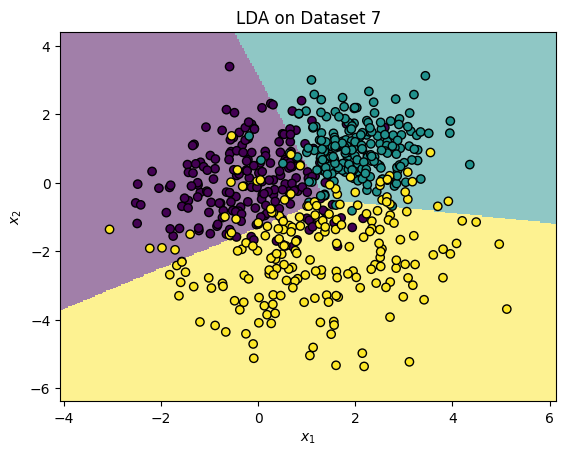

In [66]:
D7 = np.loadtxt(data_dir + 'demo_data5-7.txt', comments='#')
X = D7[:, 0:2]
y = D7[:, 2].astype('int')
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda=Lda.fit(X, y) #learning
disp = DecisionBoundaryDisplay.from_estimator(
     Lda, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('LDA on Dataset 7')
plt.savefig(img_dir+"experiment7_LDA.pdf", format='pdf')

# 第七組QDA

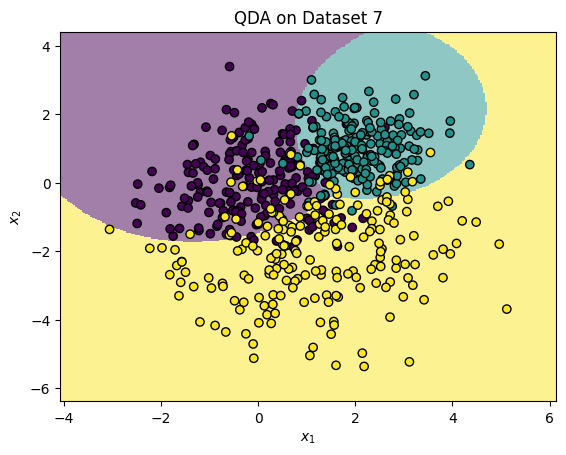

In [67]:
D7 = np.loadtxt(data_dir + 'demo_data5-7.txt', comments='#')
X = D7[:, 0:2]
y = D7[:, 2].astype('int')
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
     Qda, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('QDA on Dataset 7')
plt.savefig(img_dir+"experiment7_QDA.pdf", format='pdf')

# 第七組KNN K=5

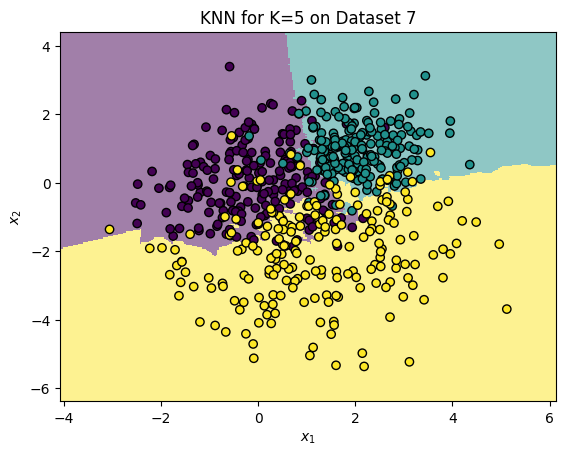

In [68]:
D7 = np.loadtxt(data_dir + 'demo_data5-7.txt', comments='#')
X = D7[:, 0:2]
y = D7[:, 2].astype('int')
Knn5 = neighbors.KNeighborsClassifier(5, weights = weights) 
Knn5.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
     Knn5, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('KNN for K=5 on Dataset 7')
plt.savefig(img_dir+"experiment7_KNN5.pdf", format='pdf')

# 第七組KNN K=15 

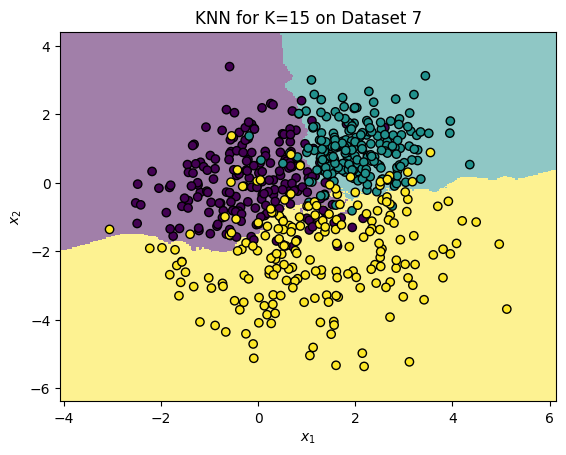

In [69]:
D7 = np.loadtxt(data_dir + 'demo_data5-7.txt', comments='#')
X = D7[:, 0:2]
y = D7[:, 2].astype('int')
Knn15 = neighbors.KNeighborsClassifier(15, weights = weights) 
Knn15.fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
     Knn15, X, response_method="predict",
     grid_resolution=300,
     plot_method='pcolormesh',
     shading="auto",
     xlabel='$x_1$', ylabel='$x_2$',
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title('KNN for K=15 on Dataset 7')
plt.savefig(img_dir+"experiment7_KNN15.pdf", format='pdf')

Training error for LDA=0.0900


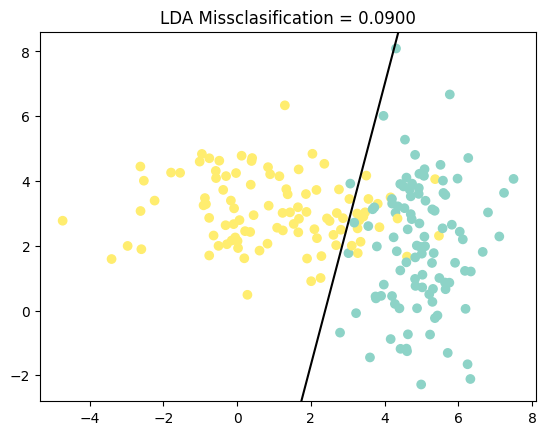

In [61]:
#載入資料 畫出scatter
D = np.loadtxt(data_dir + 'la_2.txt', comments='%') 
X = D[:, 0:2]
y = D[:,2].astype('int')
# area = 2 * np.random.randint(50, size = D[:, 0].size) 
# grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y] 
# plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )
# plt.scatter(D[:, 0], D[:, 1], c = grp_color, alpha = 0.5, marker = 'o' )
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap='Set3')
# plt.grid(True)

#fit LDA模型，跑出錯判率
Lda = LinearDiscriminantAnalysis(tol = 1e-6) 
Lda.fit(X, y)
MissClassRateLDA = 1 - Lda.score(X, y)
print("Training error for LDA={:.4f}".format(MissClassRateLDA))
plt.title('LDA Missclasification = {:.4f}'.format(MissClassRateLDA))

#畫出等高線圖
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)

Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z = Z[:, 1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,Z,[0.5],colors="black")

# cdit = {'red': [(0, 1, 1), (1, 1, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
# cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
# plt.cm.register_cmap(cmap = cmap)
# plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)
# plt.savefig(img_dir+'LDA.pdf', format='pdf')
plt.show()

